# Dependencies and files

## Install dependencies

In [ ]:
!python --version

Python 3.10.11


In [ ]:
!pip install scanpy[leiden]  gseapy==0.10.8 --quiet

# Необходимо, чтобы конкретно прогрузился matplotlib
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.4/526.4 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 25.6 MB/s eta 0:00:00


## Imports

In [ ]:
import warnings
import scanpy as sc
import gseapy


import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import json
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

Creating directory /root/.config/bioservices 


# Global variables

Нужно подключить свой гугл диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_path = 'drive/MyDrive/Spatial project/data/pseudobulks/'

In [ ]:
os.listdir(dir_path)

['expression_chimp.csv',
 'expression_human.csv',
 'expression_macaque.csv',
 'expression_spatial_libd_human.csv',
 'expression_sum_chimp.csv',
 'expression_mean_chimp.csv',
 'annotation_chimp.csv',
 'expression_sum_human.csv',
 'expression_mean_human.csv',
 'annotation_human.csv',
 'expression_sum_macaque.csv',
 'expression_mean_macaque.csv',
 'annotation_macaque.csv',
 'expression_sum_spatial_libd_human.csv',
 'expression_mean_spatial_libd_human.csv',
 'annotation_spatial_libd_human.csv',
 'pb_age_sample_norm.h5ad',
 'pb_mamm.h5ad',
 'pb_age.h5ad',
 'pb_mamm_sample_norm.h5ad',
 'pb_mamm_sample_norm_zscore.h5ad',
 'pb_mamm_sample_norm_filtered.h5ad',
 'pb_mamm_sample_zscore_filtered.h5ad']

## Load pseudobulks

In [ ]:
adata_pb = sc.read_h5ad(dir_path + 'pb_mamm.h5ad')
adata_pb

AnnData object with n_obs × n_vars = 94 × 15585
    obs: 'layer', 'sample_id', 'condition'

# Enrichment analysis (ssGSEA)

## Посчитаем ssGSEA на датасете Azimuth cell types

In [ ]:
df_ssgsea = pd.DataFrame(adata_pb.X, columns=adata_pb.var_names, index=adata_pb.obs_names)
df_ssgsea.head()

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,AGRN,RNF223,TTLL10,TNFRSF18,...,PCBP3,COL6A2,SPATC1L,LSS,MCM3AP,YBEY,PCNT,DIP2A,S100B,PRMT2
WM.human_759,0.003876,0.096899,0.019380,0.0,0.000000,0.348837,0.267442,0.0,0.000,0.000000,...,0.011628,0.058140,0.116279,0.120155,0.081395,0.011628,0.065891,0.127907,0.375969,0.500000
L5.human_759,0.010724,0.201073,0.083110,0.0,0.000000,0.525469,0.557640,0.0,0.000,0.005362,...,0.026810,0.123324,0.179625,0.193030,0.136729,0.061662,0.096515,0.115281,0.498660,0.707774
L2.human_759,0.002463,0.184729,0.029557,0.0,0.004926,0.679802,0.421182,0.0,0.000,0.000000,...,0.007389,0.083744,0.172414,0.157636,0.120690,0.049261,0.083744,0.086207,0.566502,0.800492
L3.human_759,0.003883,0.210679,0.059223,0.0,0.002913,0.669904,0.604854,0.0,0.000,0.000971,...,0.012621,0.107767,0.153398,0.221359,0.173786,0.040777,0.096116,0.093204,0.567961,0.772817
L1.human_759,0.012000,0.074000,0.028000,0.0,0.002000,0.360000,0.238000,0.0,0.002,0.000000,...,0.004000,0.108000,0.076000,0.150000,0.068000,0.028000,0.062000,0.066000,0.875999,0.442000


In [ ]:
import gseapy
ss = gseapy.ssgsea(
    data=df_ssgsea.T,
    gene_sets='Azimuth_Cell_Types_2021',
    outdir=None,
    min_size=3,
    sample_norm_method="rank",
    no_plot=True
)
ssGSEA = ss.res2d

In [ ]:
ssGSEA.head()

,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,L4.human_j12,...,L2.macaque_0704,L6.macaque_0704,WM.macaque_0704,L3.macaque_nb0904,L1.macaque_nb0904,L6.macaque_nb0904,WM.macaque_nb0904,L5.macaque_nb0904,L2.macaque_nb0904,L4.macaque_nb0904
Term|NES,,,,,,,,,,,,,,,,,,,,,
AXL+ Dendritic Cell CL0000451,-0.039278,-0.042941,-0.066456,-0.049442,0.002039,-0.081600,-0.056114,-0.028936,-0.059854,-0.035004,...,-0.050898,0.027882,-0.001335,0.004692,0.037360,0.070906,0.039059,0.013525,-0.013118,0.013137
AXL+ Myeloid Dendritic Cell CL0000782,-0.062585,-0.044676,-0.057120,-0.048149,0.000736,-0.075749,-0.062161,-0.028979,-0.056829,-0.035258,...,-0.057409,0.008091,0.005227,-0.001328,0.017439,0.050512,0.048663,-0.001994,-0.033139,0.012647
AXL+ Plasmacytoid Dendritic Cell CL0000784,-0.137522,-0.155539,-0.159702,-0.149643,-0.157757,-0.165292,-0.148464,-0.169939,-0.136996,-0.109195,...,-0.196077,-0.154380,-0.239463,-0.192249,-0.170651,-0.150663,-0.152232,-0.173635,-0.181523,-0.183921
Acinar CL0002064,-0.425346,-0.418960,-0.487373,-0.498371,-0.415781,-0.480299,-0.424065,-0.482367,-0.461688,-0.488950,...,-0.433522,-0.405623,-0.374871,-0.442980,-0.422304,-0.471862,-0.389326,-0.372277,-0.376138,-0.417348
Activated Stellate CL0002410,0.113477,0.102051,0.090465,0.084040,0.312343,0.067143,0.063231,0.043331,-0.139795,-0.121792,...,0.049891,0.031811,-0.027758,0.213802,0.409127,0.224369,0.169296,0.225179,0.206762,0.201211


In [ ]:
ssGSEA.to_csv('ssgsea_azimuth_ct.csv')

## Визуализируем результаты

In [ ]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque']:
    samples = df_ssgsea.loc[df_ssgsea.index.str.contains(cond)].index
    order = samples.sort_values()
    order_laminar = order[order.str.contains('L')].tolist()
    order_wm = order[order.str.contains('WM')].tolist()
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque']
df_ssgsea = df_ssgsea.loc[sample_order['all']]

In [ ]:
ssGSEA = ssGSEA[sample_order['all']]

In [ ]:
adata_ssgsea = an.AnnData(ssGSEA.T, obs=adata_pb.obs.loc[sample_order['all']])
adata_ssgsea

AnnData object with n_obs × n_vars = 94 × 340
    obs: 'layer', 'sample_id', 'condition'

### PCA

In [ ]:
sc.pp.pca(adata_ssgsea)

computing PCA
    with n_comps=50
    finished (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


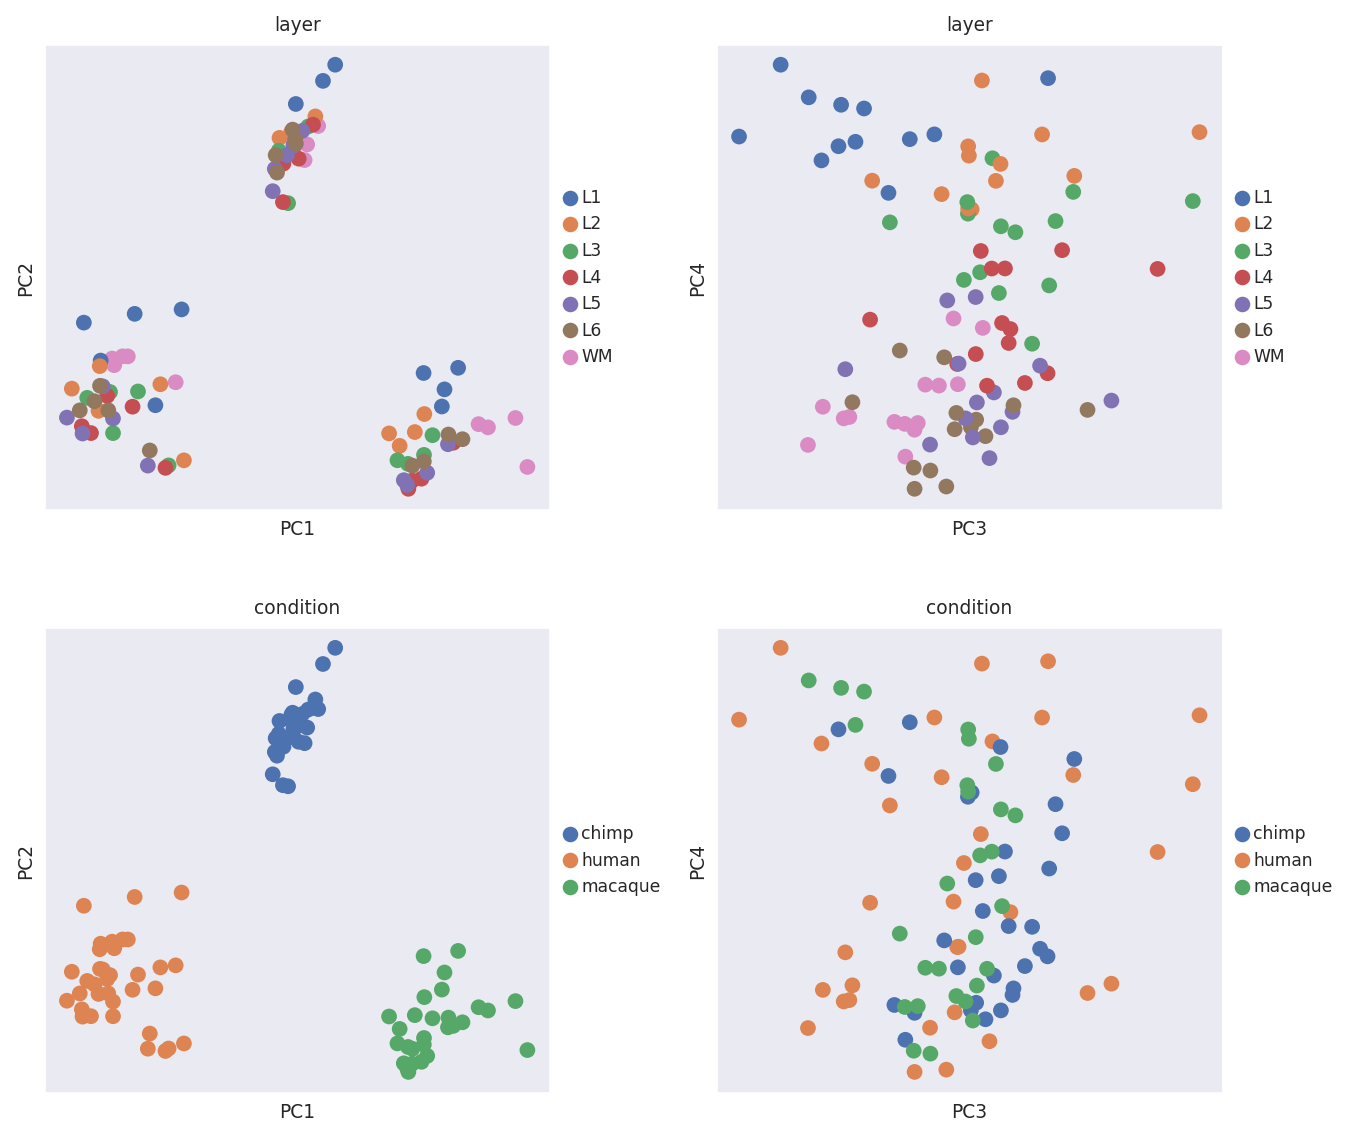

In [ ]:
sc.pl.pca(adata_ssgsea, color=['layer', 'condition'], size=200, ncols=2, components = ['1,2','3,4'])

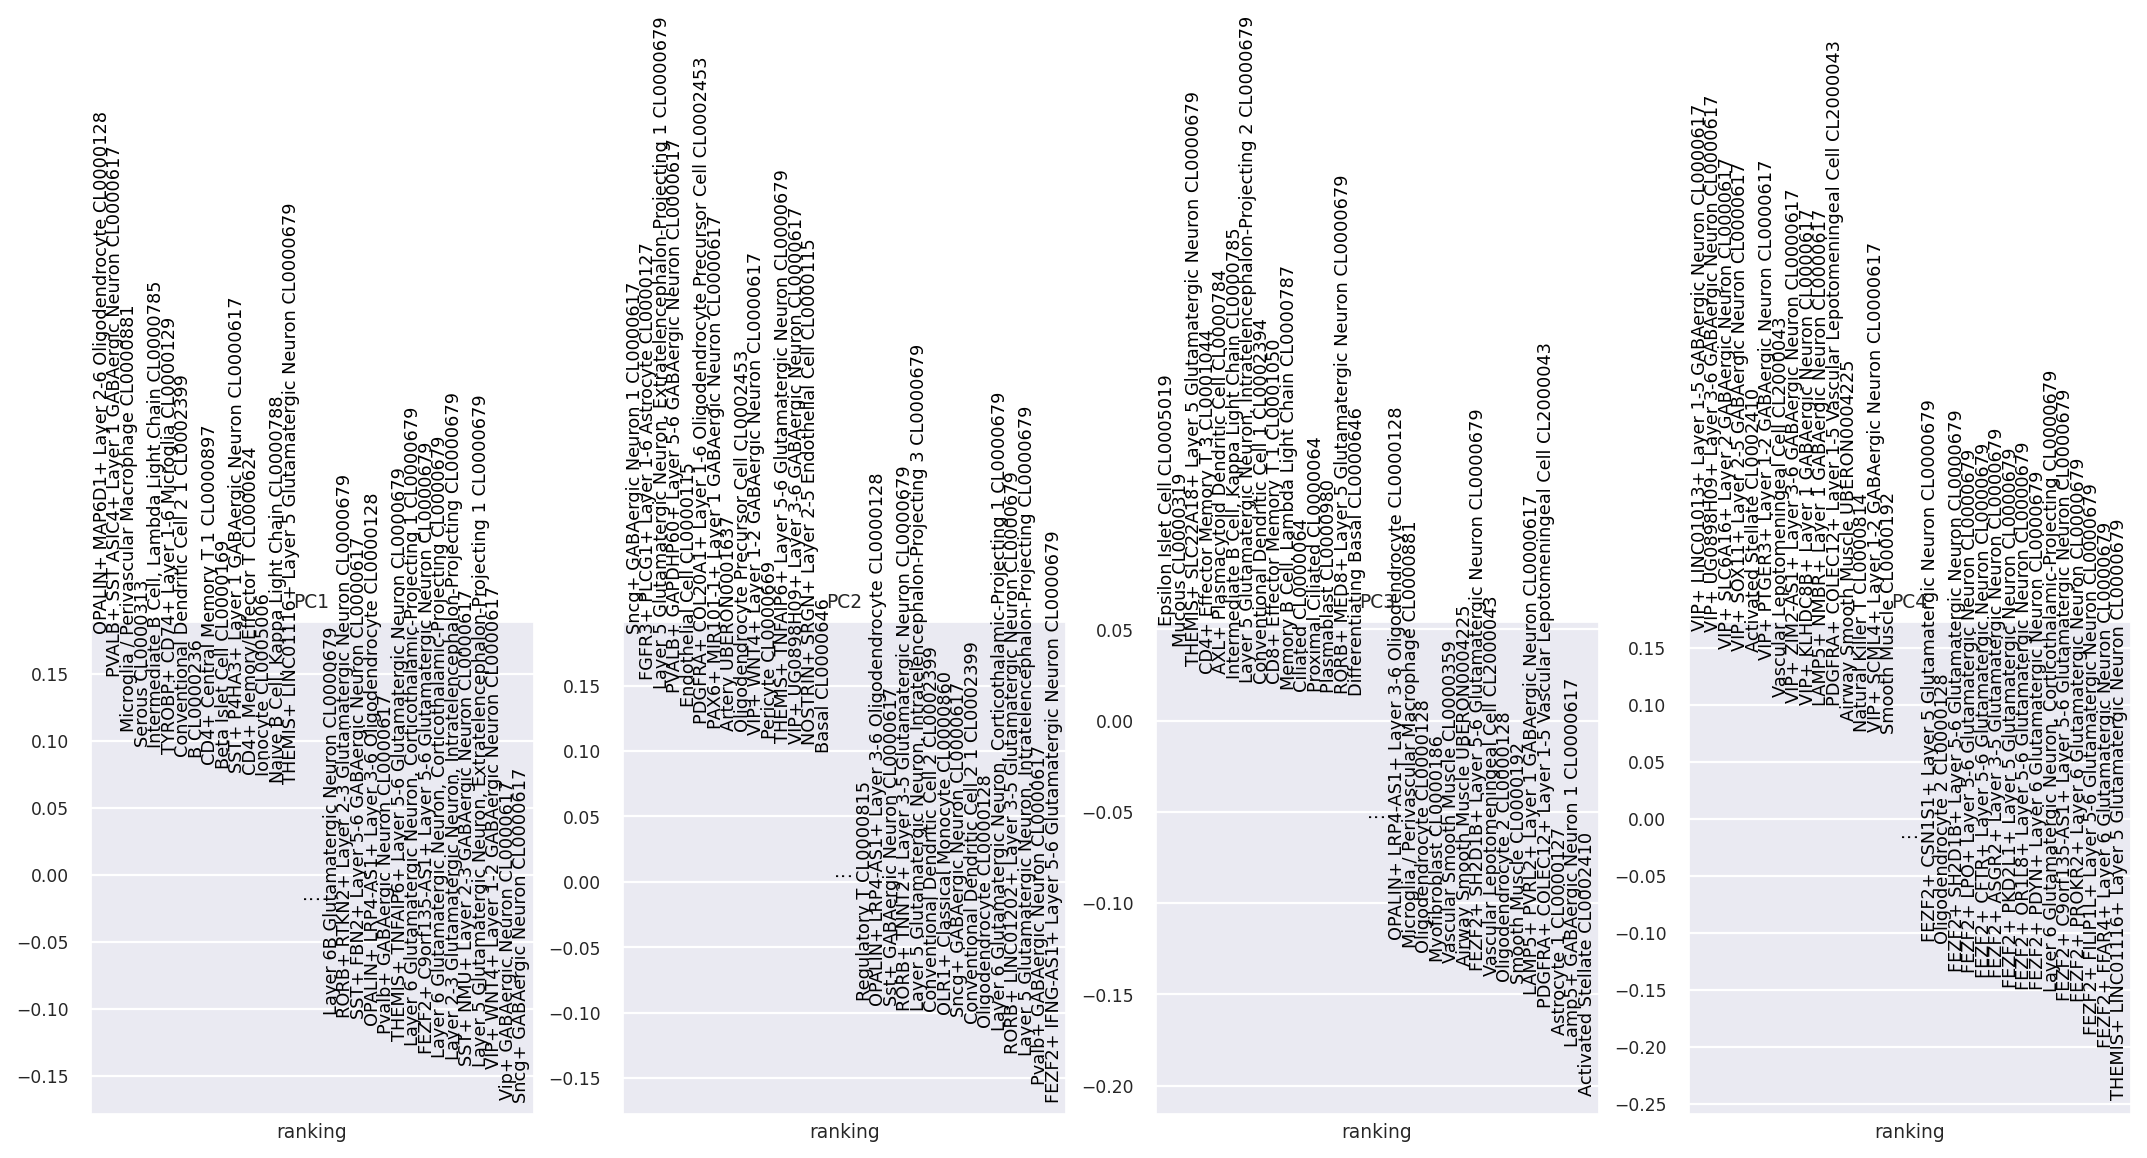

In [ ]:
sc.pl.pca_loadings(adata_ssgsea, components=[1,2,3,4])

### Кластеризация

In [33]:
adata_ssgsea.obs

,layer,sample_id,condition
WM.human_759,WM,human_759,human
WM.human_j12,WM,human_j12,human
WM.human_j3,WM,human_j3,human
WM.human_j4,WM,human_j4,human
WM.human_j6,WM,human_j6,human
...,...,...,...
L5.macaque_nb0904,L5,macaque_nb0904,macaque
L6.macaque_0701,L6,macaque_0701,macaque
L6.macaque_0703,L6,macaque_0703,macaque
L6.macaque_0704,L6,macaque_0704,macaque


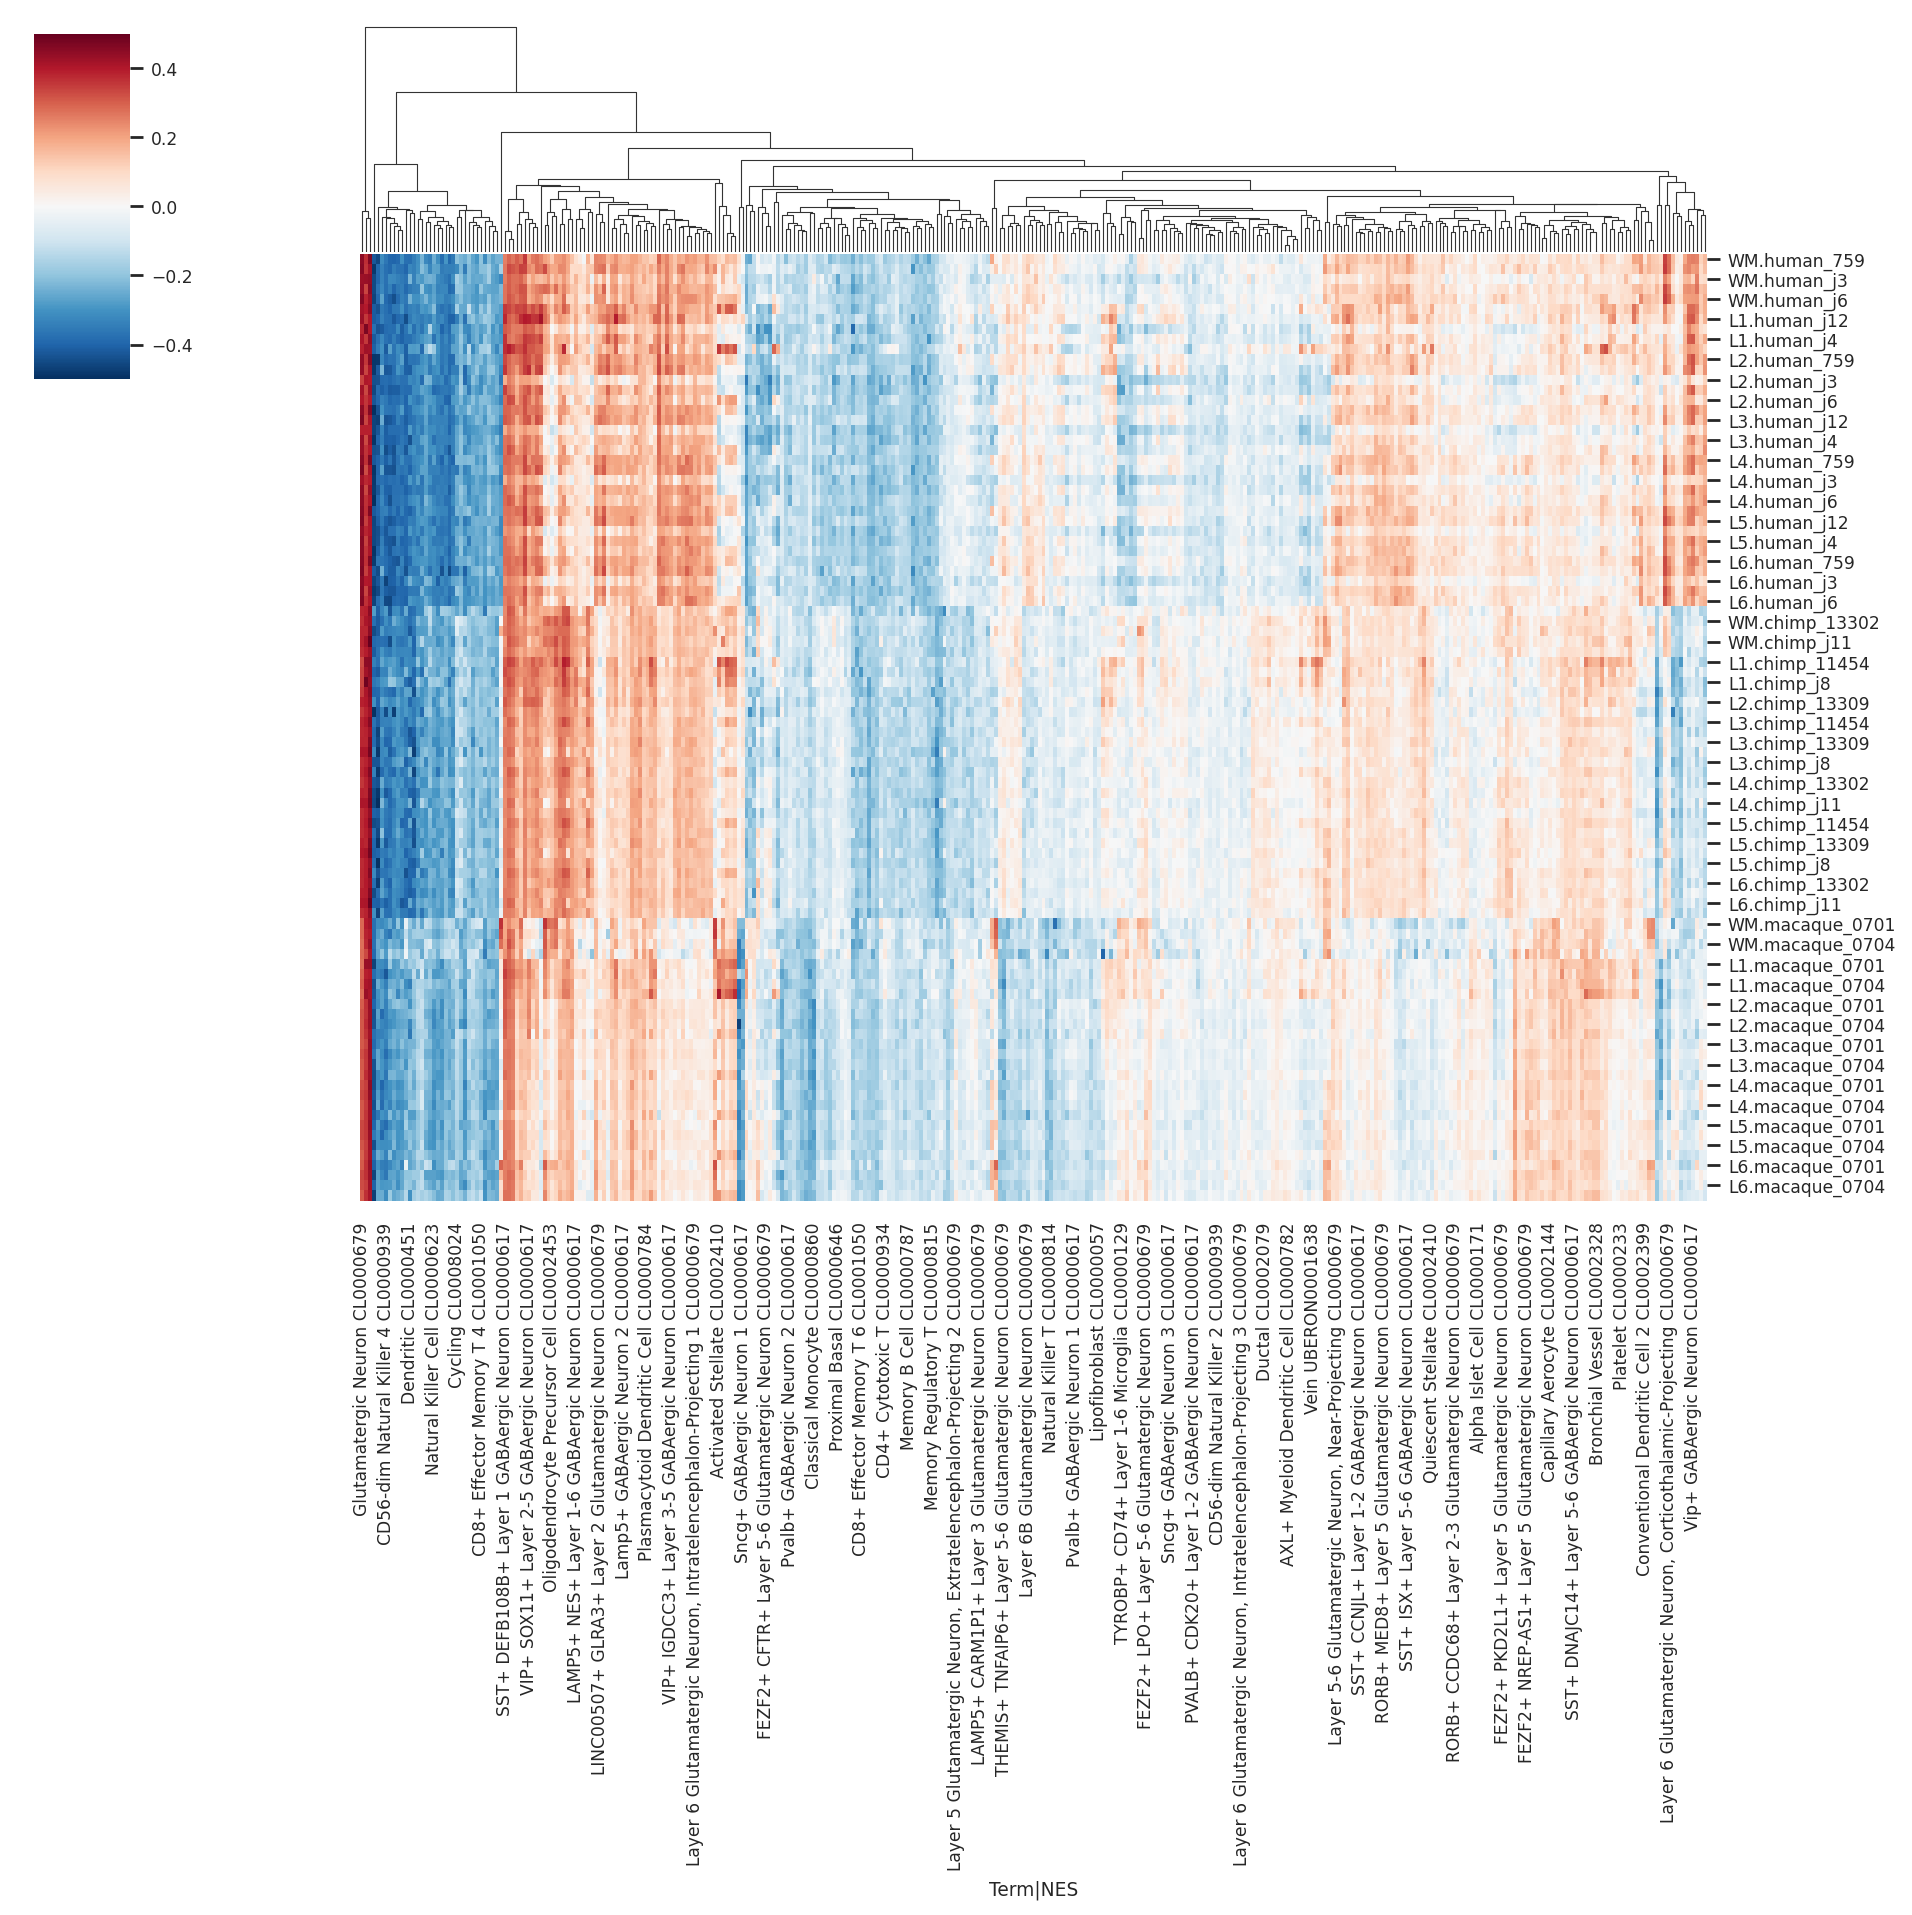

In [47]:
sc.pl.clustermap(adata_ssgsea, cmap="RdBu_r", vmin=-0.5, vmax=0.5, figsize=(12, 12), annot_kws={"size": 2}, row_cluster=False)

## Сделаем нормализацию на образец

In [48]:
def z_score(adata):
    pb_df = pd.DataFrame(adata.X, columns=adata.var_names, index=adata.obs_names)
    pb_df['sample_id'] = adata.obs['sample_id']
    pb_df.head()
    # calculate statistics
    sample_mean = pb_df.groupby('sample_id').mean()
    sample_std = pb_df.groupby('sample_id').std()
    # calculate z-score
    columns = pb_df.columns.tolist()[:-1]
    for sample in tqdm(sample_mean.index.tolist()):
        pb_df.loc[pb_df.sample_id == sample, columns] = ((pb_df.loc[pb_df.sample_id == sample, columns] - sample_mean.loc[sample])
                                                         / sample_std.loc[sample]).fillna(0)
    # write adata
    adata.X = pb_df[columns].values
    return adata

In [50]:
from tqdm.notebook import tqdm

adata_norm = z_score(adata_ssgsea)

  0%|          | 0/14 [00:00<?, ?it/s]

In [51]:
sc.pp.pca(adata_norm)

computing PCA
    with n_comps=50
    finished (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


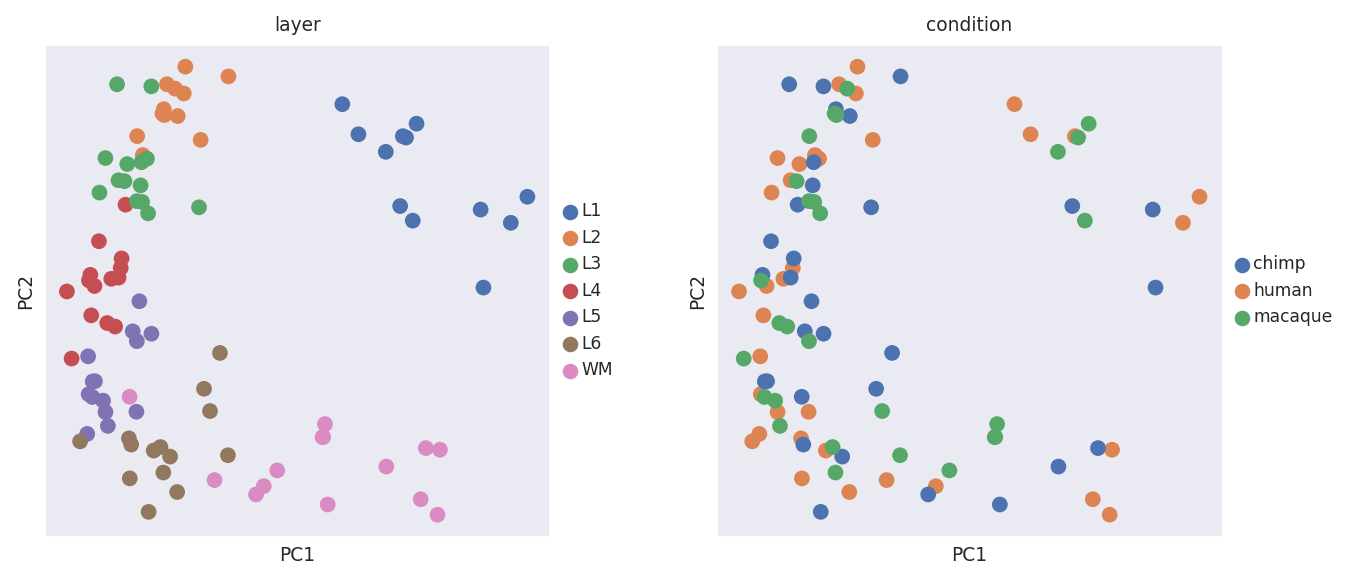

In [54]:
sc.pl.pca(adata_norm, color=['layer', 'condition'], size=200, ncols=2)

In [55]:
# сохраним результаты
adata_norm.write_h5ad('ssGSEA_zscore.h5ad')